In [15]:
import os 
import sys
import numpy as np

import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

sys.path.append('../')
from utils.pymongo_get_database import get_database

In [16]:
data_path = '../../static/processed/v2/images/'
fonts = ["eljaza", "hijazi", "naskh", "ruqah", "thuluth", "muhammadi", "almaghribi", "uthmanic"]

In [17]:
# Number of images per font
number_of_images = 0

for font in fonts:
  font_path = os.path.join(data_path, font)
  images = os.listdir(font_path)
  for image in images:
    number_of_images += 1

  print(f"Number of images in font {font}: {number_of_images}")
  number_of_images = 0

Number of images in font eljaza: 18251
Number of images in font hijazi: 18251
Number of images in font naskh: 18251
Number of images in font ruqah: 18251
Number of images in font thuluth: 18251
Number of images in font muhammadi: 18251
Number of images in font almaghribi: 18251
Number of images in font uthmanic: 18251


In [26]:
font_path = os.path.join(data_path, font)
images = os.listdir(font_path)
number_overall_images = len(images) * len(fonts)
print(f"{number_overall_images} found across all fonts")

146008 found across all fonts


In [18]:
dbname = get_database()
quran_words_collection = dbname["quran_words"]
quran_words = quran_words_collection.find()

In [19]:
# Words count
words_count = {}

for word_data in quran_words:
  word = word_data["word"]
  if word not in words_count.keys():
    words_count[word] = 1
  else:
    words_count[word] += 1
  


In [20]:
{k: words_count[k] for k in sorted(words_count.keys())[:5]}

{'آبَاءَكُمْ': 1,
 'آبَاءَنَا': 1,
 'آبَاءَهُمُ': 1,
 'آبَاءَهُمْ': 1,
 'آبَاءِ': 1}

/Users/macmini/Desktop/My Work/Projects/Personal/OCR Neural Network/Quran OCR/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65010 (\N{ARABIC LIGATURE ALLAH ISOLATED FORM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


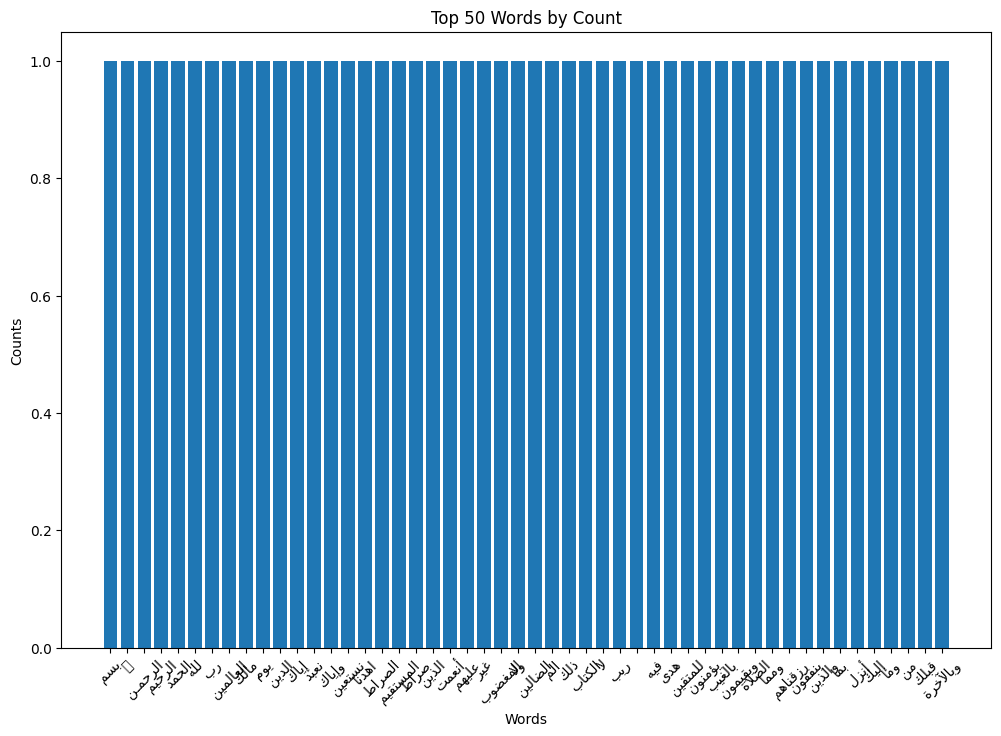

In [21]:
sorted_word_counts = sorted(words_count.items(), key=lambda item: item[1], reverse=True)

top_n = 50
top_words = sorted_word_counts[:top_n]

# Separate the words and their counts
words, counts = zip(*top_words)

# Reshape arabic
words = [get_display(arabic_reshaper.reshape(word)) for word in words]

plt.figure(figsize=(12, 8))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title(f'Top {top_n} Words by Count')
plt.xlabel('Words')
plt.ylabel('Counts')
plt.show()


In [22]:
# for font in fonts:
#   font_path = os.path.join(data_path, font)
#   images = os.listdir(font_path)
#   for image in images:
#     word_data = quran_words_collection.find_one({"id": image.replace(".png", "")},{"word": 1})
#     print(word_data)
